# Fortsetzung der messwerte, analyse der datenverteilung

In [32]:
import lmfit
from matplotlib import pyplot as plt
from mat4py import loadmat
import numpy as np
import os


In [52]:
data = loadmat('sequence_data1-1_1.mat')
shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
np.array(data["sequences"][2][0].get("Tarr")*shape0[0])

array([72.44, 72.64, 72.84, 73.04, 73.24, 73.44, 72.44, 72.64, 72.84,
       73.04, 73.24, 73.44, 72.44, 72.64, 72.84, 73.04, 73.24, 73.44])

In [ ]:
x_lst = []
t_lst = []
data = loadmat('sequence_data1-1_1.mat')

shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
for lst in data["sequences"]:
    x_lst.extend(np.array(lst[0].get("Xarr")).ravel())
    t = np.array(lst[0].get("Tarr")*shape0[0])
    t_lst.extend(t-np.min(t))
    

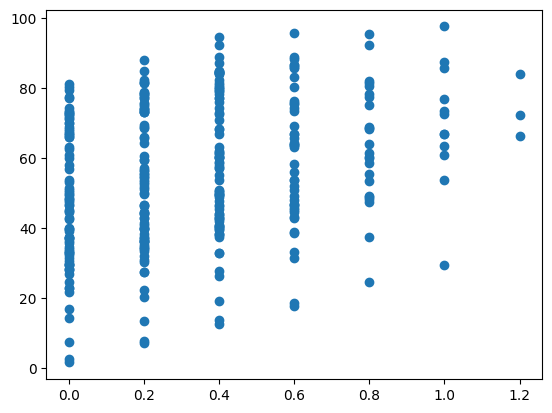

In [54]:
plt.plot(t_lst, x_lst, "o")

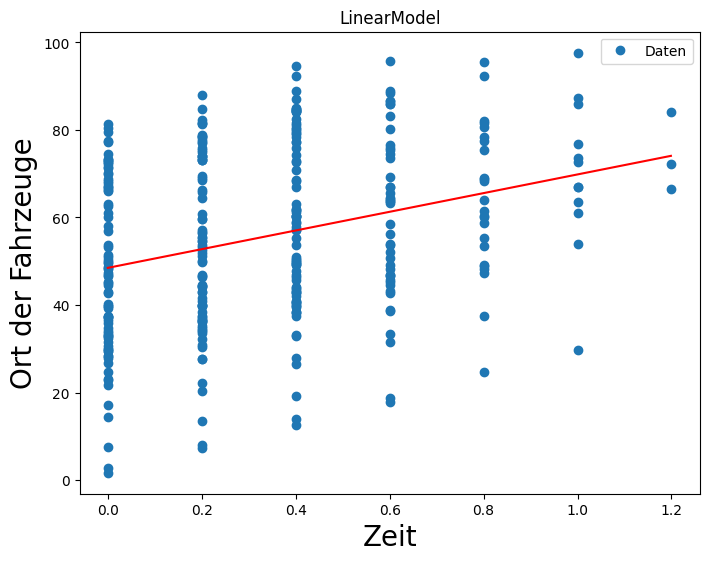

In [55]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
result = mod.fit(x_lst, pars, x=t_lst)
dynamic_resolution_array = np.arange(min(t_lst),max(t_lst), 0.001*abs(max(t_lst)-min(t_lst)))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst, yerr = Daten.get_yerr(), x = t_lst, xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst, x_lst, "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()

In [61]:
# einzelne messreihen unter sich
def d(x:np.ndarray): # Abstandsfunktion
    d = np.ones_like(x) * np.inf # anfangs distanz auf sehr groß setzen
    order_mask = np.argsort(x) # nach i-ter achse sortieren, hier x achse -> 0
    x_ordered = x[order_mask]
    for i, x_i in enumerate(x_ordered):
        for j, x_j in enumerate(x_ordered[i+1:]):
            d = np.linalg.norm(x_j - x_i) if np.linalg.norm(x_j - x_i) < d[i] else d[i]
    return d


x_lst = []
t_lst = []
data = loadmat('sequence_data1-1_1.mat')

shape0 = np.array(data["sequences"][2][0].get("Xarr")).shape
for lst in data["sequences"]:
    x = np.array(lst[0].get("Xarr")).ravel()
    x_lst.append(x)
    t = np.array(lst[0].get("Tarr")*shape0[0])
    t_lst.append(t-np.min(t))



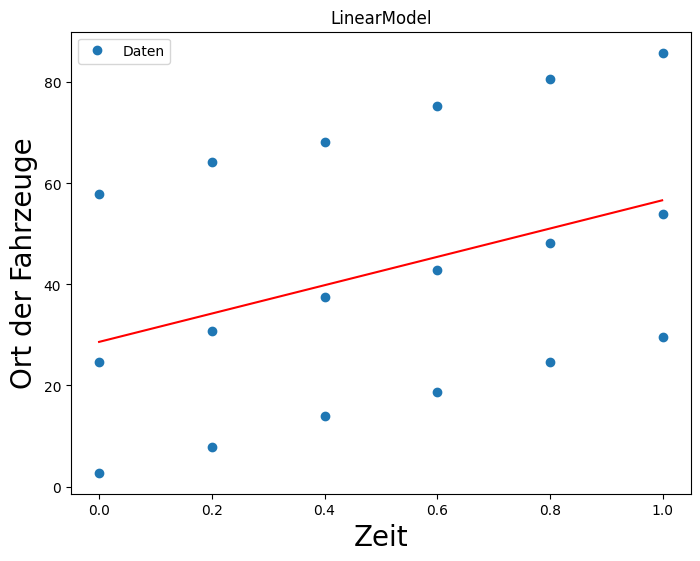

In [65]:
index = 2

from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
result = mod.fit(x_lst[index], pars, x=t_lst[index])
dynamic_resolution_array = np.arange(min(t_lst[index]),max(t_lst[index]), 0.001*abs(max(t_lst[index])-min(t_lst[index])))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst[index], yerr = Daten.get_yerr(), x = t_lst[index], xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst[index], x_lst[index], "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()

# sieht recht linear aus? 
## mehr daten

In [40]:
File_names = []
for file in os.listdir('TrafficDataset/'):
     # check the files which are end with specific extension
    if file.endswith(".mat"):
        # print path name of selected files
        File_names.append(str(os.path.join('TrafficDataset/', file)))

File_names

['TrafficDataset/sequence_data1-1_1.mat',
 'TrafficDataset/sequence_data1-1_2.mat',
 'TrafficDataset/sequence_data2-1_1.mat',
 'TrafficDataset/sequence_data2-1_2.mat',
 'TrafficDataset/sequence_data3-1_1.mat',
 'TrafficDataset/sequence_data3-1_2.mat',
 'TrafficDataset/sequence_data4-1_1.mat',
 'TrafficDataset/sequence_data4-1_2.mat',
 'TrafficDataset/sequence_data5-1_1.mat',
 'TrafficDataset/sequence_data5-1_2.mat']

In [44]:
x_lst = []
t_lst = []
File_names = []
for file in os.listdir('TrafficDataset/'):
     # check the files which are end with specific extension
    if file.endswith(".mat"):
        # print path name of selected files
        File_names.append(str(os.path.join('TrafficDataset/', file)))

for fileName in File_names:
	data = loadmat(fileName)
	for lst in data["sequences"]:
		x_lst.extend(np.array(lst[0].get("Xarr")).ravel())
		shape0 = np.array(lst[0].get("Xarr")).shape
		t = np.array(lst[0].get("Tarr")*shape0[0])
		t_lst.extend(t-np.min(t))
    

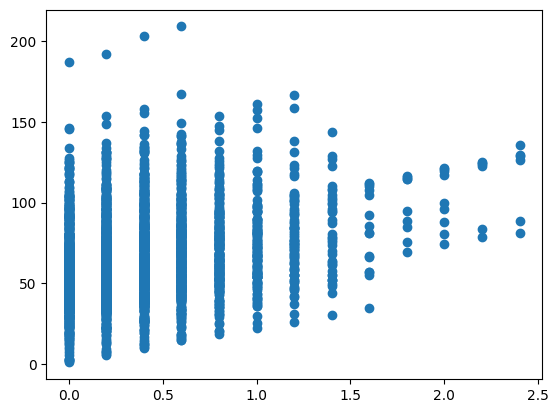

In [46]:
plt.plot(t_lst, x_lst, "o")

Fit

In [ ]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, LinearModel

mod = LinearModel()# Model(plot_func)#GaussianModel(prefix = "a")+GaussianModel(prefix = "b")

pars = mod.make_params()
pars

name,value,initial value,min,max,vary
slope,1.00000000,None,-inf,inf,True
intercept,0.00000000,None,-inf,inf,True


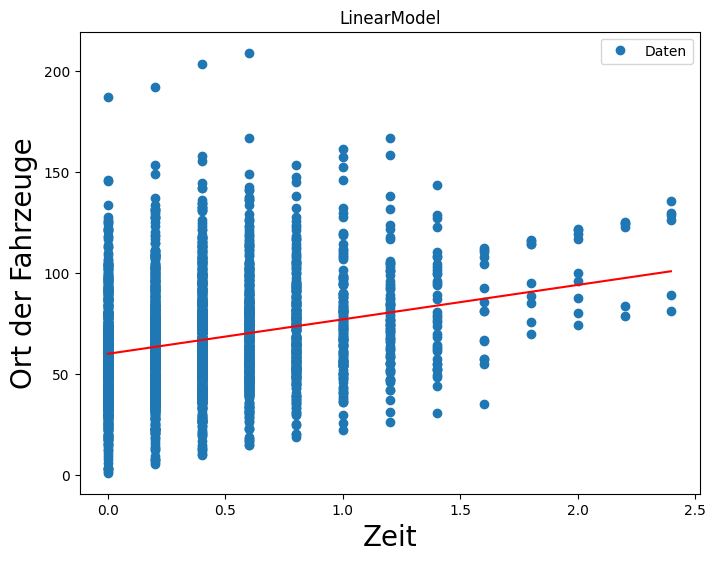

In [51]:
result = mod.fit(x_lst, pars, x=t_lst)
dynamic_resolution_array = np.arange(min(t_lst),max(t_lst), 0.001*abs(max(t_lst)-min(t_lst)))

plt.figure(figsize=(8, 6))
# plt.errorbar(y = x_lst, yerr = Daten.get_yerr(), x = t_lst, xerr = Daten.get_xerr(), \
#     fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
#     label = r'Werte')

plt.plot(t_lst, x_lst, "o", label="Daten")
plt.legend()
plt.ylabel("Ort der Fahrzeuge", fontsize=20)
plt.xlabel("Zeit", fontsize=20)
plt.title('LinearModel')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str((result.result.redchi,3)))

plt.show()